<a href="https://colab.research.google.com/github/santiagonajera/ClasesCientifica/blob/main/Anscombe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Primero instalamos bokeh si no está instalado
!pip install bokeh

# Importamos las bibliotecas necesarias
import numpy as np
from bokeh.plotting import figure, show
from bokeh.layouts import column  # Cambiamos gridplot por column
from bokeh.io import output_notebook, save, output_file
from scipy import stats
import pandas as pd
from bokeh.palettes import Spectral4

# Habilitamos la salida de notebook para Bokeh
output_notebook()

# Datos del cuarteto de Anscombe
datos = {
    'Dataset I': {
        'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
        'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
    },
    'Dataset II': {
        'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
        'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
    },
    'Dataset III': {
        'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
        'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
    },
    'Dataset IV': {
        'x': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
        'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
    }
}

# Configuración de los gráficos
TOOLS = "pan,box_zoom,reset,save,wheel_zoom,hover"

# Crear figuras
plots = []
for (titulo, dataset), color in zip(datos.items(), Spectral4):
    x = dataset['x']
    y = dataset['y']

    # Calcular línea de regresión
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    x_line = np.array([min(x), max(x)])
    y_line = slope * x_line + intercept

    # Crear figura
    p = figure(title=titulo, width=600, height=300, tools=TOOLS)  # Ajustamos el tamaño para mejor visualización vertical

    # Añadir puntos usando scatter
    p.scatter(x=x, y=y, size=10, color=color, alpha=0.7, legend_label="Datos")

    # Añadir línea de regresión
    p.line(x_line, y_line, color='red', line_width=2,
           legend_label=f"y = {slope:.2f}x + {intercept:.2f}")

    # Configuración adicional
    p.grid.grid_line_color = 'gray'
    p.grid.grid_line_alpha = 0.3
    p.x_range.range_padding = 0.1
    p.y_range.range_padding = 0.1
    p.xaxis.axis_label = 'X'
    p.yaxis.axis_label = 'Y'
    p.x_range.start = 0
    p.x_range.end = 20
    p.y_range.start = 0
    p.y_range.end = 15

    # Configurar leyenda
    p.legend.location = "top_left"
    p.legend.click_policy="hide"

    plots.append(p)

# Crear el layout vertical usando column
layout = column(plots)

# Mostrar el gráfico
show(layout)

# Función para calcular estadísticas
def calcular_estadisticas(x, y):
    return {
        'Media X': np.mean(x),
        'Media Y': np.mean(y),
        'Varianza X': np.var(x, ddof=1),
        'Varianza Y': np.var(y, ddof=1),
        'Correlación': np.corrcoef(x, y)[0,1],
        'Pendiente': stats.linregress(x, y).slope,
        'Intercepción': stats.linregress(x, y).intercept,
        'R²': stats.linregress(x, y).rvalue**2
    }

# Calcular y mostrar estadísticas
for titulo, dataset in datos.items():
    print(f"\nEstadísticas para {titulo}:")
    stats_dict = calcular_estadisticas(dataset['x'], dataset['y'])
    for key, value in stats_dict.items():
        print(f"{key}: {value:.4f}")



Estadísticas para Dataset I:
Media X: 9.0000
Media Y: 7.5009
Varianza X: 11.0000
Varianza Y: 4.1273
Correlación: 0.8164
Pendiente: 0.5001
Intercepción: 3.0001
R²: 0.6665

Estadísticas para Dataset II:
Media X: 9.0000
Media Y: 7.5009
Varianza X: 11.0000
Varianza Y: 4.1276
Correlación: 0.8162
Pendiente: 0.5000
Intercepción: 3.0009
R²: 0.6662

Estadísticas para Dataset III:
Media X: 9.0000
Media Y: 7.5000
Varianza X: 11.0000
Varianza Y: 4.1226
Correlación: 0.8163
Pendiente: 0.4997
Intercepción: 3.0025
R²: 0.6663

Estadísticas para Dataset IV:
Media X: 9.0000
Media Y: 7.5009
Varianza X: 11.0000
Varianza Y: 4.1232
Correlación: 0.8165
Pendiente: 0.4999
Intercepción: 3.0017
R²: 0.6667


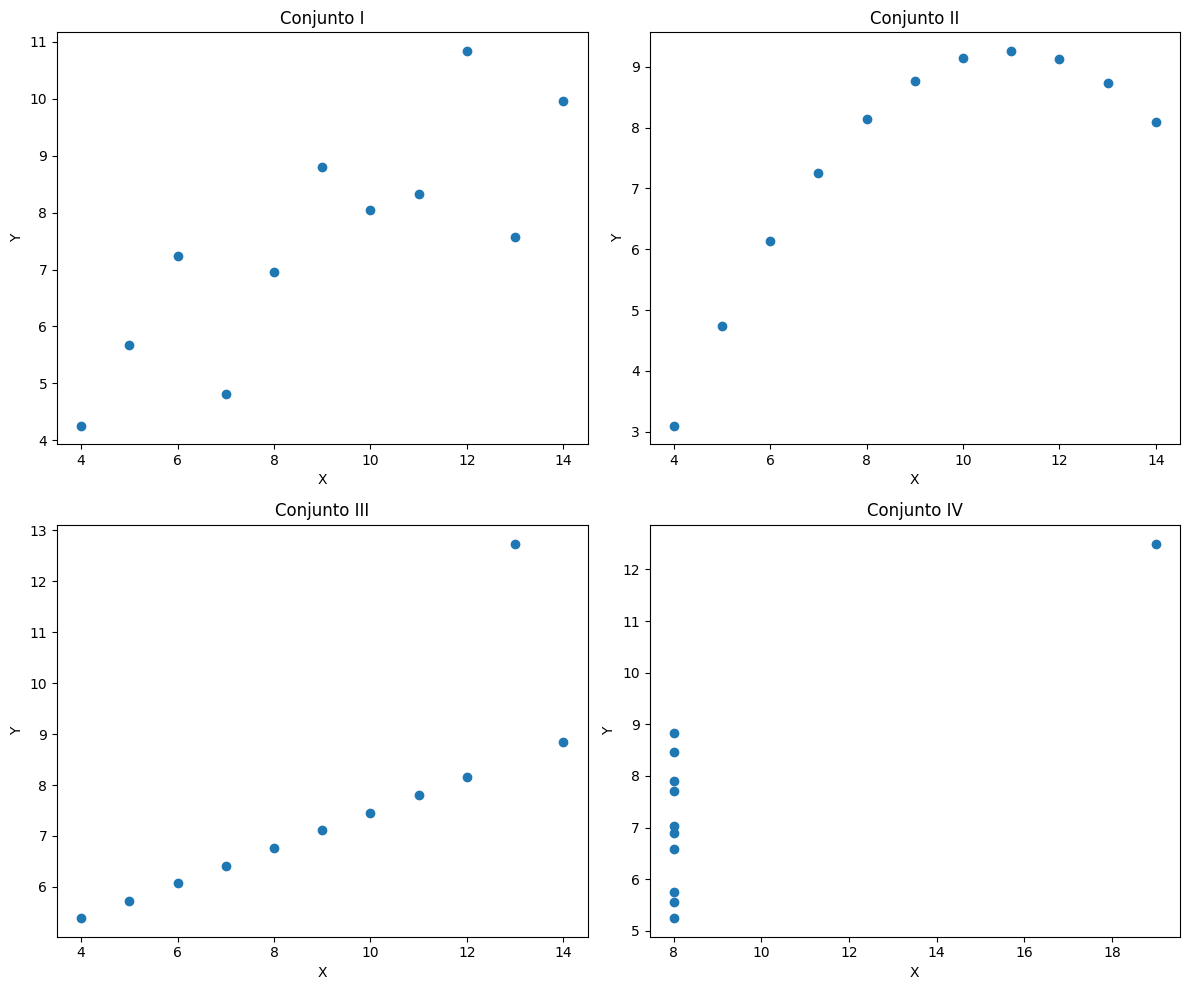

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Datos del Cuarteto de Anscombe
anscombe_quartet = {
    'I': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
          'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]},
    'II': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
           'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]},
    'III': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
            'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]},
    'IV': {'x': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
           'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]}
}

# Crear gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (key, data) in enumerate(anscombe_quartet.items()):
    axes[i].scatter(data['x'], data['y'])
    axes[i].set_title(f'Conjunto {key}')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')

plt.tight_layout()
plt.show()

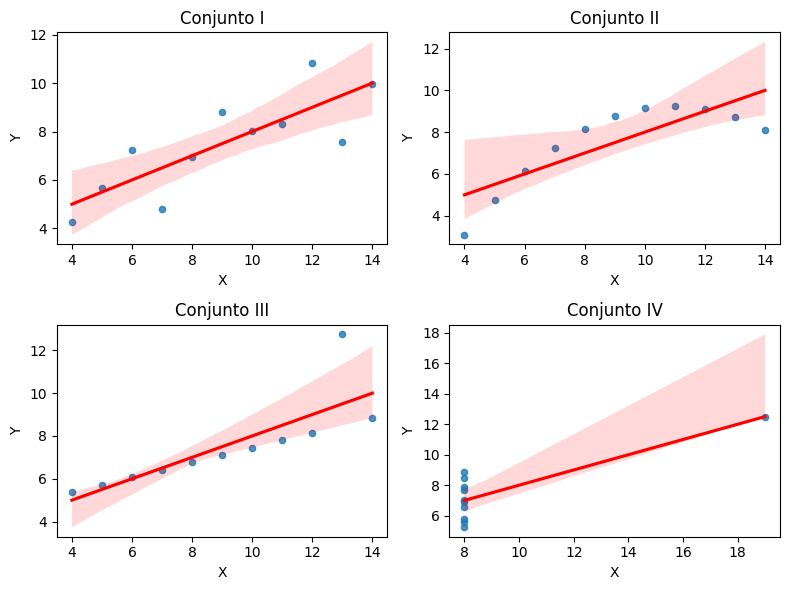

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Datos del Cuarteto de Anscombe
anscombe_quartet = {
    'I': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
          'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]},
    'II': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
           'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]},
    'III': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
            'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]},
    'IV': {'x': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
           'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]}
}

# Crear gráficos
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

for i, (key, data) in enumerate(anscombe_quartet.items()):
    sns.regplot(x=data['x'], y=data['y'], ax=axes[i], scatter_kws={'s':20}, line_kws={"color":"red"})
    axes[i].set_title(f'Conjunto {key}')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')

plt.tight_layout()
plt.show()
